# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-05 16:11:38.472140


In [14]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Input, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

# Importing the concatenate library of Keras
from keras.layers.merge import concatenate

print(datetime.datetime.now())

2019-06-05 16:13:33.904882


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-06-05 16:11:40.996785


(60000, 28, 28)
2019-06-05 16:11:41.031034


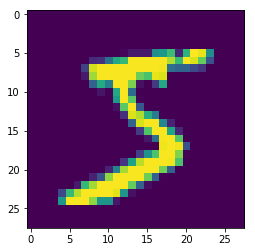

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-05 16:11:41.202995


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-05 16:11:41.372058


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-06-05 16:11:41.378277


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-05 16:11:41.390801


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-05 16:11:41.396099


In [23]:
## MAIN BLOCK

from keras.layers import Activation
#model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

x1 = Input(shape=(28, 28, 1))
x2 = Convolution2D(32, 3, 3, border_mode='same')(x1) #28,28; 3
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
temp1 = concatenate([x1, x2])
x3 = Convolution2D(32, 3, 3, border_mode='same')(temp1) #28,28; 5
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
temp2 = concatenate([temp1, x3])
x4 = MaxPooling2D(pool_size=(2, 2))(temp2) #14,14; 10
x5 = Convolution2D(32, 3, 3, border_mode='same')(x4) #14,14; 12
x5 = BatchNormalization()(x5)
x5 = Activation('relu')(x5)
temp3 = concatenate([x4, x5])
x6 = Convolution2D(32, 3, 3, border_mode='same')(temp3) #14,14; 14
x6 = BatchNormalization()(x6)
x6 = Activation('relu')(x6)
temp4 = concatenate([temp3, x6])
x7 = Convolution2D(32, 3, 3, border_mode='same')(temp4) #14,14; 16
x7 = BatchNormalization()(x7)
x7 = Activation('relu')(x7)
temp5 = concatenate([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2, 2))(temp5) #7,7; 32
x9 = Convolution2D(32, 3, 3, border_mode='same')(x8) #7,7; 34
x9 = BatchNormalization()(x9)
x9 = Activation('relu')(x9)
temp6 = concatenate([x8, x9])
x10 = Convolution2D(32, 3, 3, border_mode='same')(temp6) #7,7; 36
x10 = BatchNormalization()(x10)
x10 = Activation('relu')(x10)
temp7 = concatenate([temp6, x10])
x11 = Convolution2D(32, 3, 3, border_mode='same')(temp7) #7,7; 38
x11 = BatchNormalization()(x11)
x11 = Activation('relu')(x11)

output = Convolution2D(10, 1, 1)(x11) #7,7; 38
output = Convolution2D(10, 7, 7)(output) #1,1; 38

output = Flatten()(output)
output = Activation('softmax')(output)

print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/p

2019-06-05 16:19:29.744314


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7))`


In [24]:
model = Model(inputs=[x1], outputs=[output])
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 28, 28, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 28, 28, 32)   128         conv2d_32[0][0]                  
__________________________________________________________________________________________________
activation_26 (Activation)      (None, 28, 28, 32)   0           batch_normalization_25[0][0]     
__________________________________________________________________________________________________
concatenat

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-05 16:19:42.507400


In [26]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.0882 - acc: 0.9733
Epoch 2/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.0382 - acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0295 - acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.0243 - acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0205 - acc: 0.9934
Epoch 6/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0157 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0139 - acc: 0.9956
Epoch 8/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0117 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0086 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 24s 394us/step - loss: 

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-05 16:23:54.702487


In [28]:
print(score)
print(datetime.datetime.now())

[0.022664897717660688, 0.9932]
2019-06-05 16:23:54.714810
